In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import toad
from toad.metrics import KS, AUC
from toad.plot import bin_plot, badrate_plot

# **Data Preprocessing**

## Load Data

In [3]:
pd.set_option('display.max_columns', None)

# Reading file Parquet
df = pd.read_parquet('C:/Users/Lenovo/Downloads/PBI/Home Credit/df_train_full.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 105 entries, SK_ID_CURR to AVERAGE_DPD
dtypes: float64(54), int64(21), object(30)
memory usage: 1.1+ GB


## Data Understanding

In [5]:
pd.set_option('display.max_columns', None)

# Select columns with object data types and store them in the 'categoric' variable
categoric = df.select_dtypes('object')

# Select columns with numeric data types and store them in the 'numeric' variable
numeric = df.select_dtypes('number')

# Determine the number of rows and columns
rows = df.shape[0]
cols = df.shape[1]

# Print the shape of the DataFrame
print(f'Number of Rows: {rows}\nNumber of Columns: {cols}')

# Print a sample of 6 rows from the DataFrame
print('\nSample Data:')
display(df.sample(6))

# Print summary statistics for categorical data
print('\nSummary Statistics for Categorical Data:')
display(categoric.describe().T)

# Print summary statistics for numerical data
print('\nSummary Statistics for Numerical Data:')
display(numeric.describe().T)

# Define categorical_col and numerical_col before printing
categorical_col = categoric.columns.tolist()  # Get the list of categorical columns
numerical_col = numeric.columns.tolist()      # Get the list of numerical columns


Number of Rows: 1430155
Number of Columns: 105

Sample Data:


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
177686       144268       0              Cash loans           F            N   
662620       265789       0              Cash loans           F            N   
493685       223508       0              Cash loans           F            N   
1401605      449231       0              Cash loans           F            N   
1367031      440567       0              Cash loans           F            N   
593518       248508       0              Cash loans           M            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
177686                Y             2          135000.0         824823.0   
662620                N             0          157500.0         239418.0   
493685                Y             0          247500.0        1078200.0   
1401605               N             2           90000.0         227520.0   
1367031               N             0          126000.0         573628.5   
593518                N             0          135000.0         108000.0   

         AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE_curr  \
177686            24246.0              688500.0        Unaccompanied   
662620            14647.5              211500.0        Unaccompanied   
493685            38331.0              900000.0        Unaccompanied   
1401605           10606.5              180000.0               Family   
1367031           24435.0              463500.0        Unaccompanied   
593518             4198.5              108000.0        Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
177686                Working  Secondary / secondary special   
662620   Commercial associate               Higher education   
493685                Working  Secondary / secondary special   
1401605               Working  Secondary / secondary special   
1367031               Working  Secondary / secondary special   
593518                Working  Secondary / secondary special   

           NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
177686                Married    House / apartment   
662620              Separated    House / apartment   
493685                Married    House / apartment   
1401605               Married    House / apartment   
1367031  Single / not married  Municipal apartment   
593518              Separated    House / apartment   

         REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
177686                     0.010500      -15253           -962   
662620                     0.035792      -20662          -3009   
493685                     0.008230      -14410           -910   
1401605                    0.020246      -10945          -4114   
1367031                    0.018634      -21411           -656   
593518                     0.014520      -20411          -4600   

         DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
177686             -7239.0            -5346           1               1   
662620             -6791.0            -4225           1               1   
493685             -6378.0            -4752           1               1   
1401605            -5155.0             -279           1               1   
1367031            -6887.0            -4549           1               1   
593518             -3580.0            -3971           1               1   

         FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
177686                 0                 1           0           0   
662620                 0                 1           0           0   
493685                 0                 1           0           0   
1401605                1                 1           0           0   
1367031                0                 1           0           0   
593518                 0                 1           0           0   

        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
177686         Laborers             


Summary Statistics for Categorical Data:


count unique  \
NAME_CONTRACT_TYPE_curr          1430155      2   
CODE_GENDER                      1430155      3   
FLAG_OWN_CAR                     1430155      2   
FLAG_OWN_REALTY                  1430155      2   
NAME_TYPE_SUITE_curr             1430155      7   
NAME_INCOME_TYPE                 1430155      8   
NAME_EDUCATION_TYPE              1430155      5   
NAME_FAMILY_STATUS               1430155      6   
NAME_HOUSING_TYPE                1430155      6   
OCCUPATION_TYPE                  1430155     18   
WEEKDAY_APPR_PROCESS_START_curr  1430155      7   
ORGANIZATION_TYPE                1430155     58   
EMERGENCYSTATE_MODE              1430155      2   
STATUS_BIN                       1254668      4   
NAME_CONTRACT_TYPE_prev          1413701      4   
WEEKDAY_APPR_PROCESS_START_prev  1413701      7   
FLAG_LAST_APPL_PER_CONTRACT      1413701      2   
NAME_CASH_LOAN_PURPOSE           1413701     25   
NAME_CONTRACT_STATUS             1413701      4   
NAME_PAYMENT_TYPE                1413701      4   
CODE_REJECT_REASON               1413701      9   
NAME_TYPE_SUITE_prev             1413701      8   
NAME_CLIENT_TYPE                 1413701      4   
NAME_GOODS_CATEGORY              1413701     27   
NAME_PORTFOLIO                   1413701      5   
NAME_PRODUCT_TYPE                1413701      3   
CHANNEL_TYPE                     1413701      8   
NAME_SELLER_INDUSTRY             1413701     11   
NAME_YIELD_GROUP                 1413701      5   
PRODUCT_COMBINATION              1413701     17   

                                                           top     freq  
NAME_CONTRACT_TYPE_curr                             Cash loans  1320679  
CODE_GENDER                                                  F   964822  
FLAG_OWN_CAR                                                 N   947544  
FLAG_OWN_REALTY                                              Y  1031672  
NAME_TYPE_SUITE_curr                             Unaccompanied  1171310  
NAME_INCOME_TYPE                                       Working   730613  
NAME_EDUCATION_TYPE              Secondary / secondary special  1046822  
NAME_FAMILY_STATUS                                     Married   921040  
NAME_HOUSING_TYPE                            House / apartment  1279761  
OCCUPATION_TYPE                                       Laborers   716492  
WEEKDAY_APPR_PROCESS_START_curr                        TUESDAY   251516  
ORGANIZATION_TYPE                       Business Entity Type 3   308918  
EMERGENCYSTATE_MODE                                         No  1418749  
STATUS_BIN                                          heavy_late   790645  
NAME_CONTRACT_TYPE_prev                             Cash loans   626764  
WEEKDAY_APPR_PROCESS_START_prev                      WEDNESDAY   215519  
FLAG_LAST_APPL_PER_CONTRACT                                  Y  1406387  
NAME_CASH_LOAN_PURPOSE                                     XAP   786937  
NAME_CONTRACT_STATUS                                  Approved   886099  
NAME_PAYMENT_TYPE                        Cash through the bank   882700  
CODE_REJECT_REASON                                         XAP  1145533  
NAME_TYPE_SUITE_prev                                   Unknown   694672  
NAME_CLIENT_TYPE                                      Repeater  1037682  
NAME_GOODS_CATEGORY                                        XNA   797209  
NAME_PORTFOLIO                                             POS   592460  
NAME_PRODUCT_TYPE                                          XNA   900053  
CHANNEL_TYPE                           Credit and cash offices   600342  
NAME_SELLER_INDUSTRY                                       XNA   715322  
NAME_YIELD_GROUP                                           XNA   429198  
PRODUCT_COMBINATION                                       Cash   235414


Summary Statistics for Numerical Data:


count           mean            std        min  \
SK_ID_CURR                 1430155.0  278470.247890  102802.095340   100002.0   
TARGET                     1430155.0       0.086242       0.280722        0.0   
CNT_CHILDREN               1430155.0       0.403887       0.716518        0.0   
AMT_INCOME_TOTAL           1430155.0  173603.622588  198330.285285    25650.0   
AMT_CREDIT_curr            1430155.0  589338.592951  387420.355419    45000.0   
...                              ...            ...            ...        ...   
NFLAG_INSURED_ON_APPROVAL  1413701.0       0.199366       0.399524        0.0   
AMT_INSTALMENT             1413701.0  135133.806580  280811.736748        0.0   
AMT_PAYMENT                1413701.0  136538.978006  300142.070810        0.0   
DIFF_INSTALLMENT_PAYMENT   1413701.0   -1405.171426   73348.780933 -3195000.0   
AVERAGE_DPD                 769614.0       1.021295      21.751332        0.0   

                                25%        50%         75%           max  
SK_ID_CURR                 189361.0  278956.00  367509.000  4.562550e+05  
TARGET                          0.0       0.00       0.000  1.000000e+00  
CNT_CHILDREN                    0.0       0.00       1.000  1.900000e+01  
AMT_INCOME_TOTAL           112500.0  157500.00  211500.000  1.170000e+08  
AMT_CREDIT_curr            270000.0  508495.50  808650.000  4.050000e+06  
...                             ...        ...         ...           ...  
NFLAG_INSURED_ON_APPROVAL       0.0       0.00       0.000  1.000000e+00  
AMT_INSTALMENT                  0.0   37148.22  136007.100  1.934759e+07  
AMT_PAYMENT                     0.0   36030.42  131706.945  1.934759e+07  
DIFF_INSTALLMENT_PAYMENT        0.0       0.00       0.000  2.602349e+06  
AVERAGE_DPD                     0.0       0.00       0.000  1.267622e+03  

[75 rows x 8 columns]

In [6]:
print("Categorical columns: ", categorical_col)
print("\nNumerical columns: ", numerical_col)

Categorical columns:  ['NAME_CONTRACT_TYPE_curr', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_curr', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_curr', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'STATUS_BIN', 'NAME_CONTRACT_TYPE_prev', 'WEEKDAY_APPR_PROCESS_START_prev', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_prev', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

Numerical columns:  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_curr', 'AMT_ANNUITY_curr', 'AMT_GOODS_PRICE_curr', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_

## Handle Missing Value

In [7]:
dfe = df.copy()

# Check for duplicate rows
duplicate_rows = dfe.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Function to calculate and display columns with missing values
def check_nan(dfe):
    # Count null values
    null_values = dfe.isnull().sum()

    # Create a DataFrame showing total null values and their percentages
    nvc = pd.DataFrame(null_values[null_values > 0].sort_values(), columns=['Total Null Values'])  # Only include columns with null values
    nvc['Percentage'] = (nvc['Total Null Values'] / dfe.shape[0]) * 100
    nvc["Data Type"] = [dfe[col].dtype for col in nvc.index]  # Retrieve data types for each column

    # Sort by total null values and percentage
    nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

    # Return a styled result with a blue gradient
    return nvc.style.background_gradient(cmap='Blues')

# Call the function and store the result
styled_result = check_nan(dfe)

# To display the result in Jupyter Notebook, use:
styled_result


Number of duplicate rows: 0


In [72]:
missing_percent = dfe.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\2794544943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


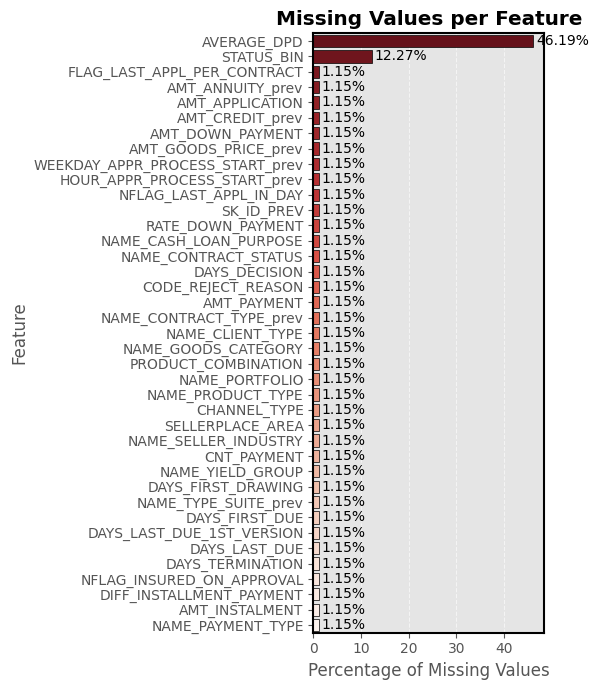

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_percent_sorted = missing_percent.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(6, 7))
ax = sns.barplot(
    x=missing_percent_sorted.values, 
    y=missing_percent_sorted.index, 
    palette="Reds_r",
    edgecolor='black'
)

# Add percentage labels to the bars
for index, value in enumerate(missing_percent_sorted.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

# Labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.title('Missing Values per Feature', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add border to the whole chart
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


## Feature Engineering

In [18]:
train_full = df
# x train categorical value binning
train_full['AGE'] = round(abs(train_full['DAYS_BIRTH'] / 365.25)).astype(int)

train_full['AGE'].value_counts()

AGE
39    41708
40    41302
38    40703
41    39763
37    39252
44    39202
43    39164
42    39030
28    37304
32    37223
31    36987
36    36948
30    36039
45    35493
46    35001
33    34872
35    34757
54    34709
34    34562
29    34358
47    34153
57    33692
55    33498
48    33244
60    32935
53    32653
59    32366
56    31910
49    31658
52    31404
58    30819
50    30790
61    29596
51    29441
63    28123
27    27419
64    27134
62    26665
65    22938
26    17900
25    15978
66    13998
24    13756
23    11407
67     9987
68     9018
22     6086
21     1733
69     1477
Name: count, dtype: int64

In [19]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age <= 44:
        return 'Adult'
    elif 45 <= age <= 59:
        return 'Middle_Age'
    else:
        return 'Senior'

train_full['AGE_GROUP'] = train_full['AGE'].apply(age_group)


train_full = train_full[train_full.NAME_FAMILY_STATUS != 'Unknown']

# make a function to replace columns value contains XNA or XAP with np.nan
def replace_xna_xap(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].replace(['XNA', 'XAP'], np.nan)
    return df

train_full = replace_xna_xap(train_full)

# replace abnormal value
replace_val = {4.5 : 5,
               0.5 : 1}
train_full['CNT_FAM_MEMBERS'] = train_full['CNT_FAM_MEMBERS'].replace(replace_val)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\55557160.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(['XNA', 'XAP'], np.nan)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\55557160.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_full['CNT_FAM_MEMBERS'] = train_full['CNT_FAM_MEMBERS'].replace(replace_val)


# Exploratory Data Analysis

In [20]:
# Get numerical columns from the DataFrame 'df'
num_columns = train_full.select_dtypes(include=['number']).columns

# Now you can use 'num_columns' as intended
num_columns # numerical columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_curr', 'AMT_ANNUITY_curr', 'AMT_GOODS_PRICE_curr',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_curr',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SO

### Univariate Analysis: Numerical Data

In [21]:
len(num_columns)

76

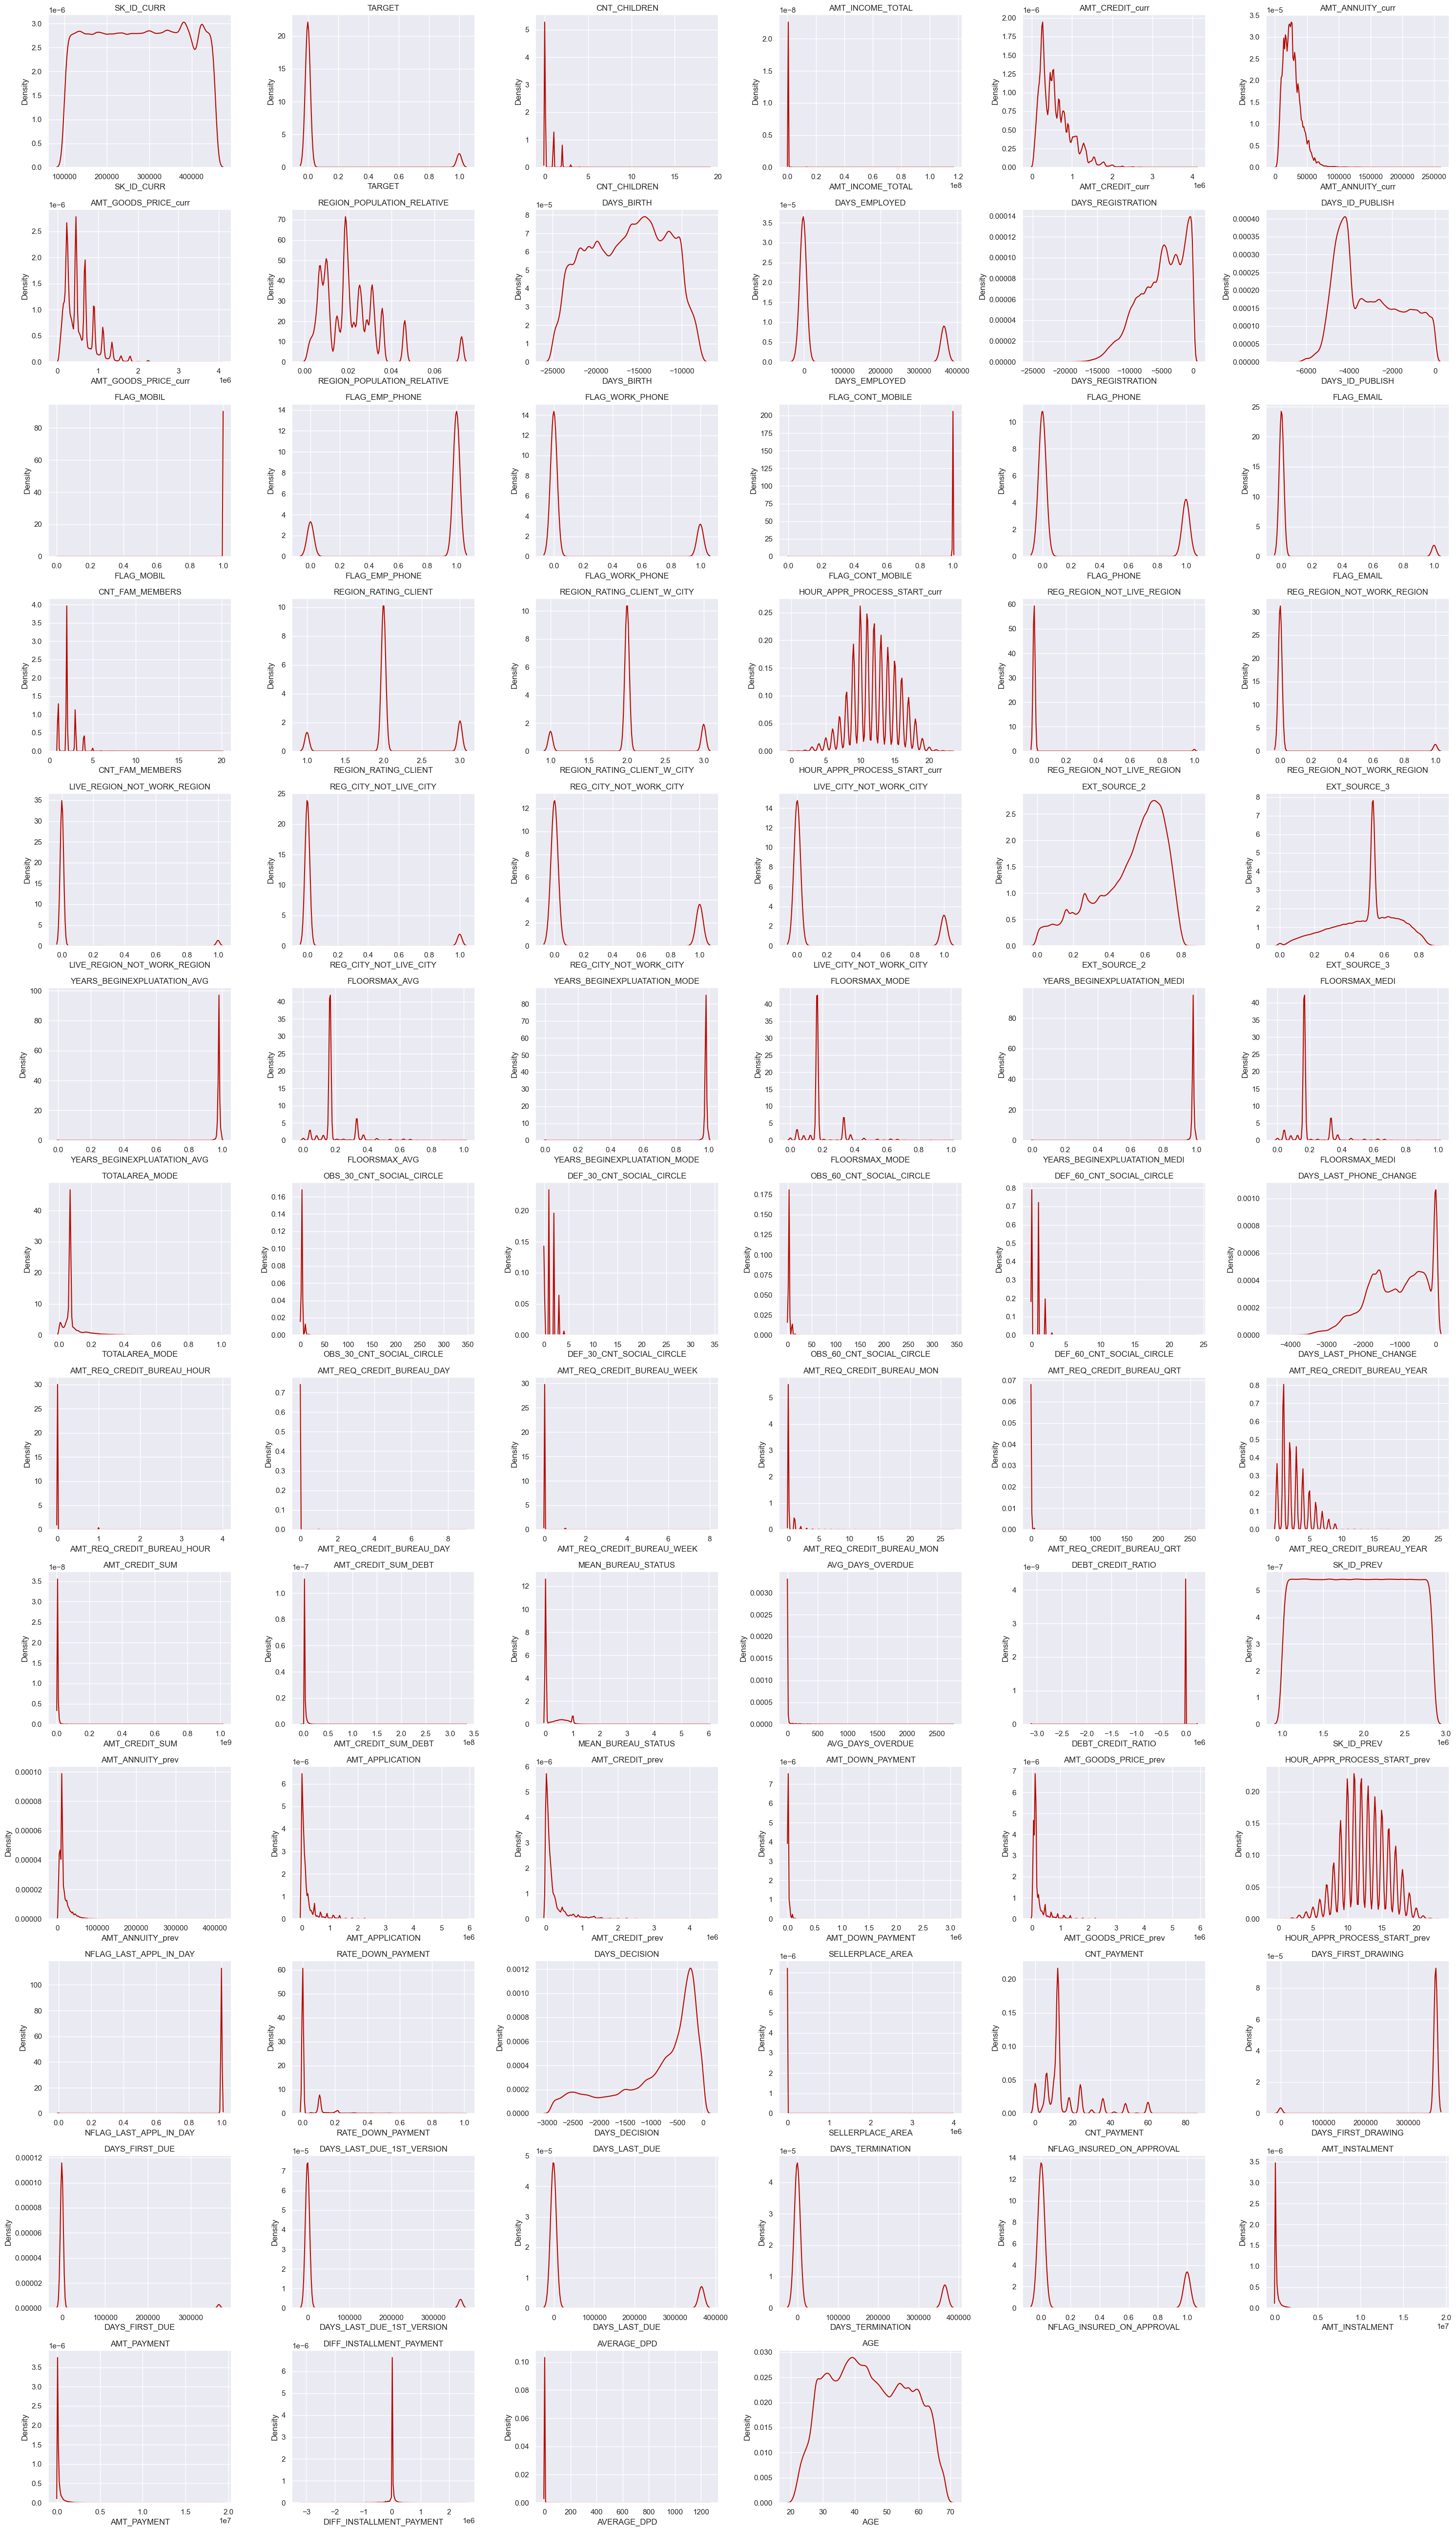

In [36]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure num_columns has 76 columns
n = len(num_columns)
cols = 6  # You can change this
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust for better spacing

for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=train_full, x=column, color='#b50900')
    plt.title(column)

plt.tight_layout()
plt.show()


### Univariate Analysis: Categorical Data

In [59]:
# Get categorical columns from the DataFrame 'train_full'
cat_columns = train_full.select_dtypes(include=['object', 'category']).columns

# Now you can use 'cat_columns' as intended
cat_columns  # categorical columns


Index(['NAME_CONTRACT_TYPE_curr', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_curr', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_curr',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'STATUS_BIN',
       'NAME_CONTRACT_TYPE_prev', 'WEEKDAY_APPR_PROCESS_START_prev',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE_prev', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AGE_GROUP'],
      dtype='object')

In [60]:
len(cat_columns)

31

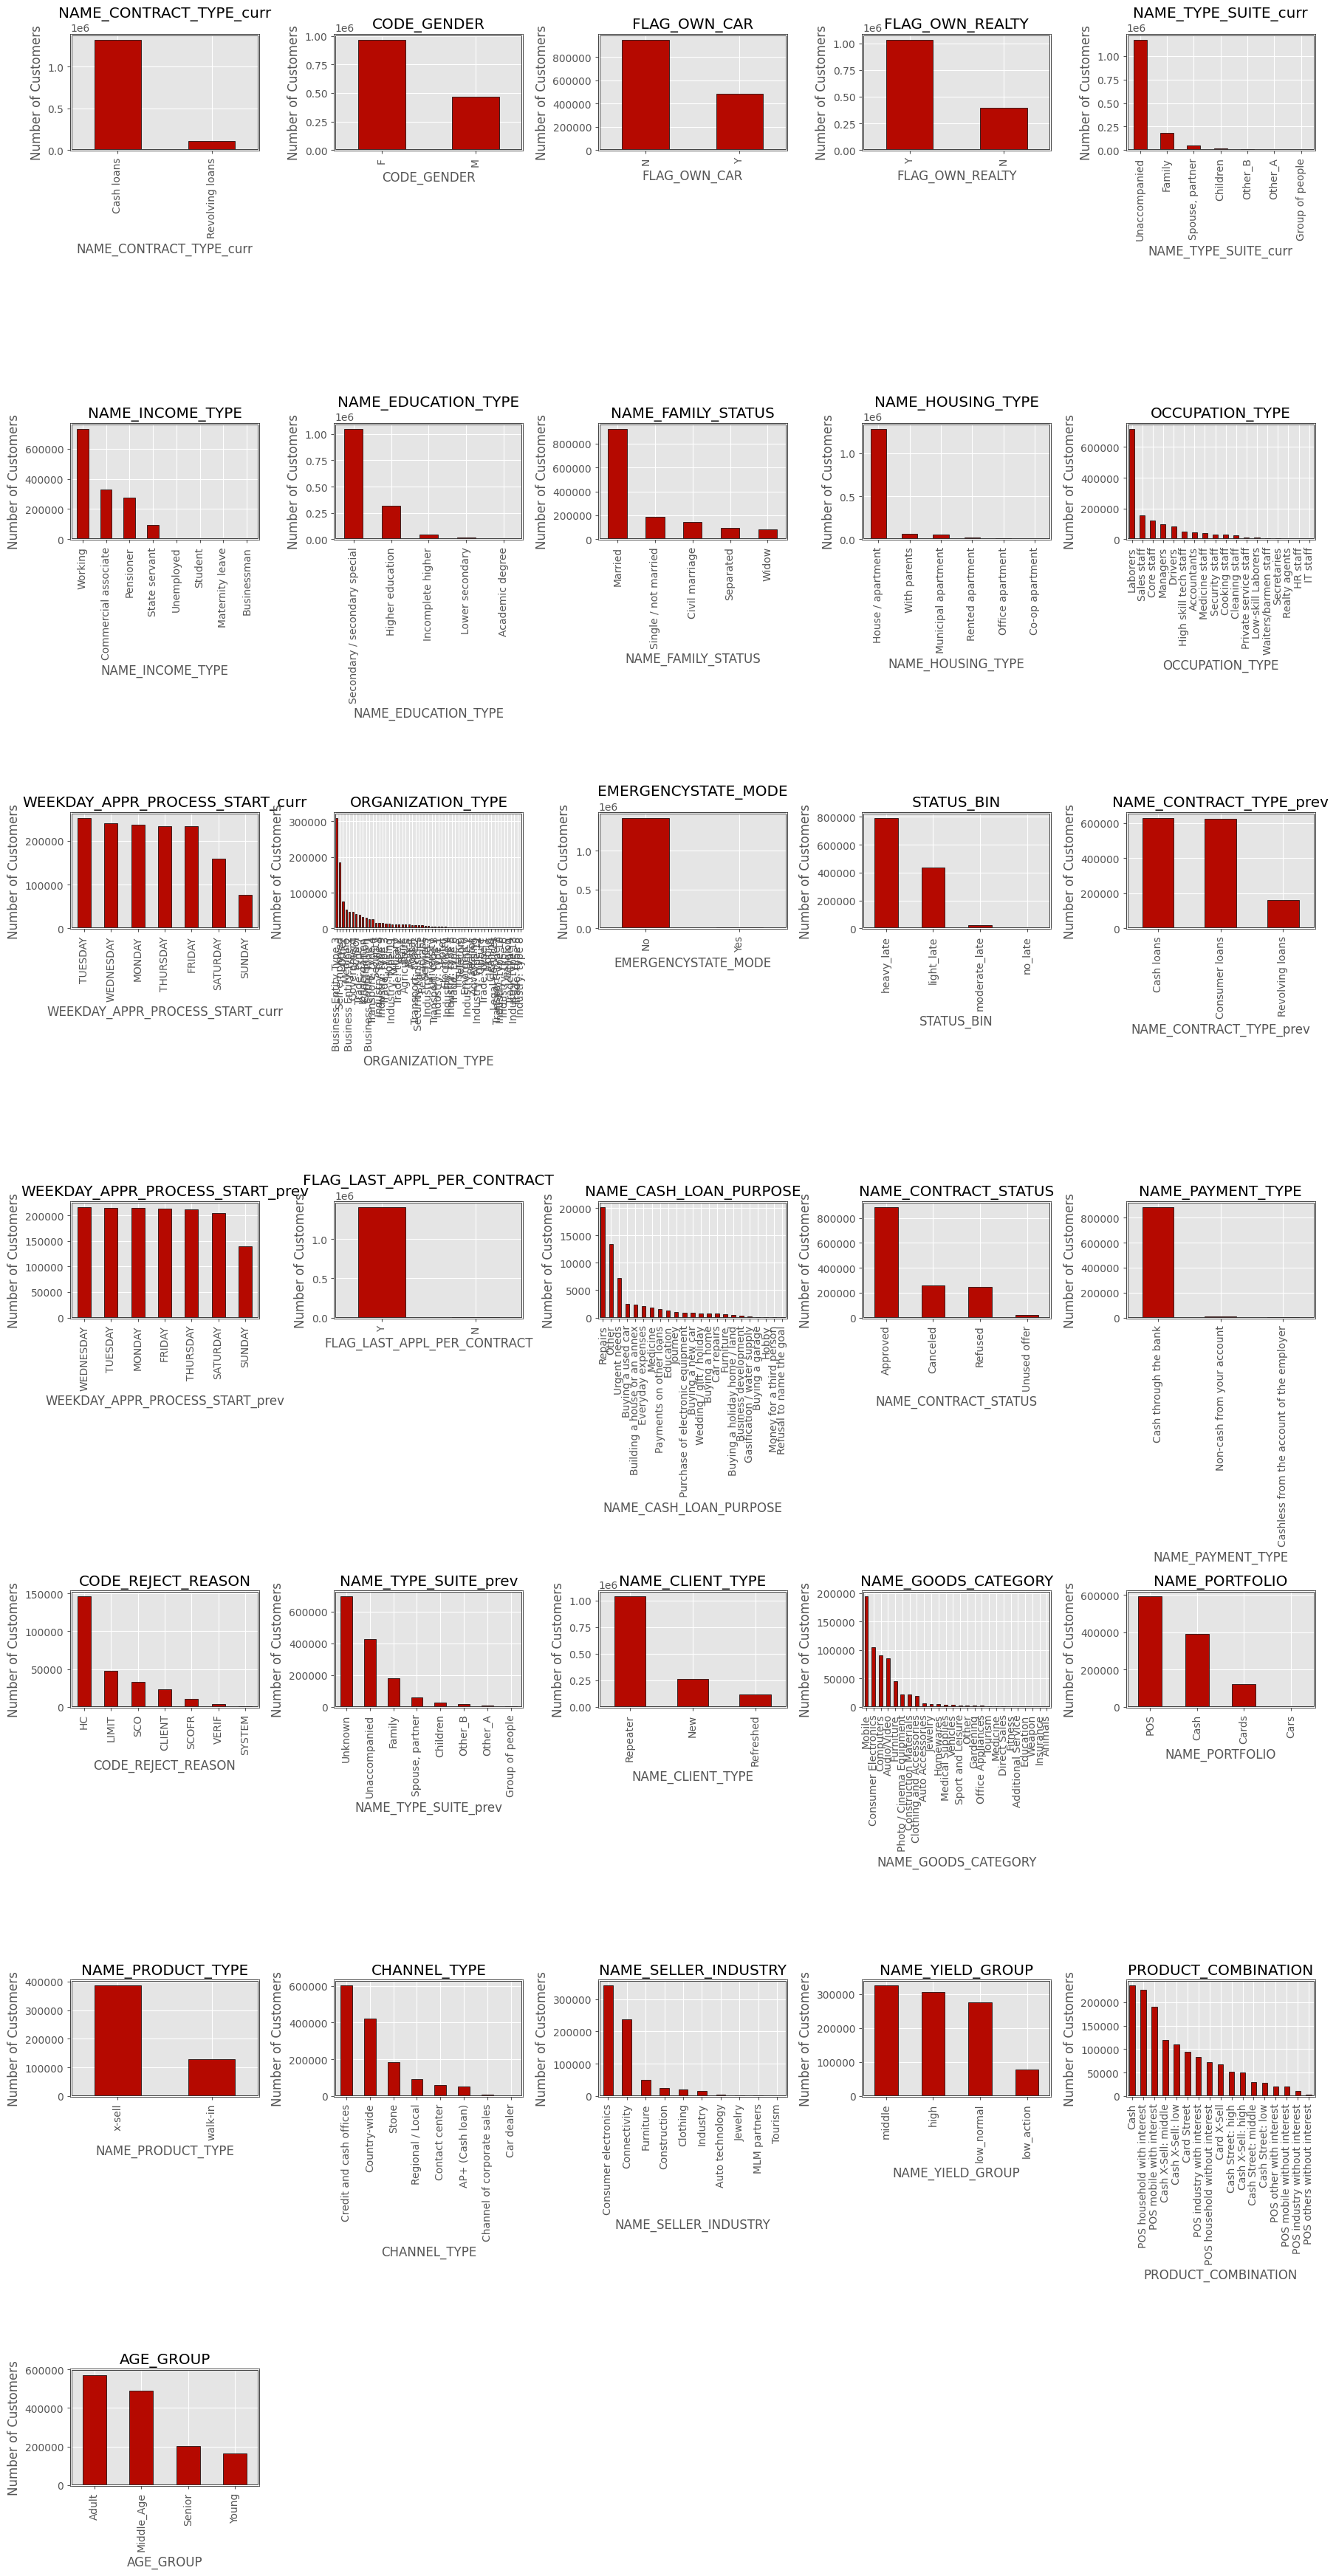

In [68]:
import matplotlib.patches as patches

# Set the style
plt.style.use("ggplot")

# Create the canvas
fig, axes = plt.subplots(7, 5, figsize=(18, 35))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each categorical variable
for idx, column in enumerate(cat_columns):
    ax = axes[idx]
    
    # Plot bar chart
    train_full[column].value_counts().plot(kind="bar", ax=ax, edgecolor='black', color='#b50900' )
    
    # Labeling
    ax.set_xlabel(column)
    ax.set_ylabel("Number of Customers")
    ax.set_title(column)
    
    # Draw border around the whole plot
    rect = patches.Rectangle(
        (0, 0), 1, 1,
        transform=ax.transAxes,
        linewidth=2,
        edgecolor='black',
        facecolor='none',
        clip_on=False
    )
    ax.add_patch(rect)

# Hide unused subplots if any
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Bivariate Analysis

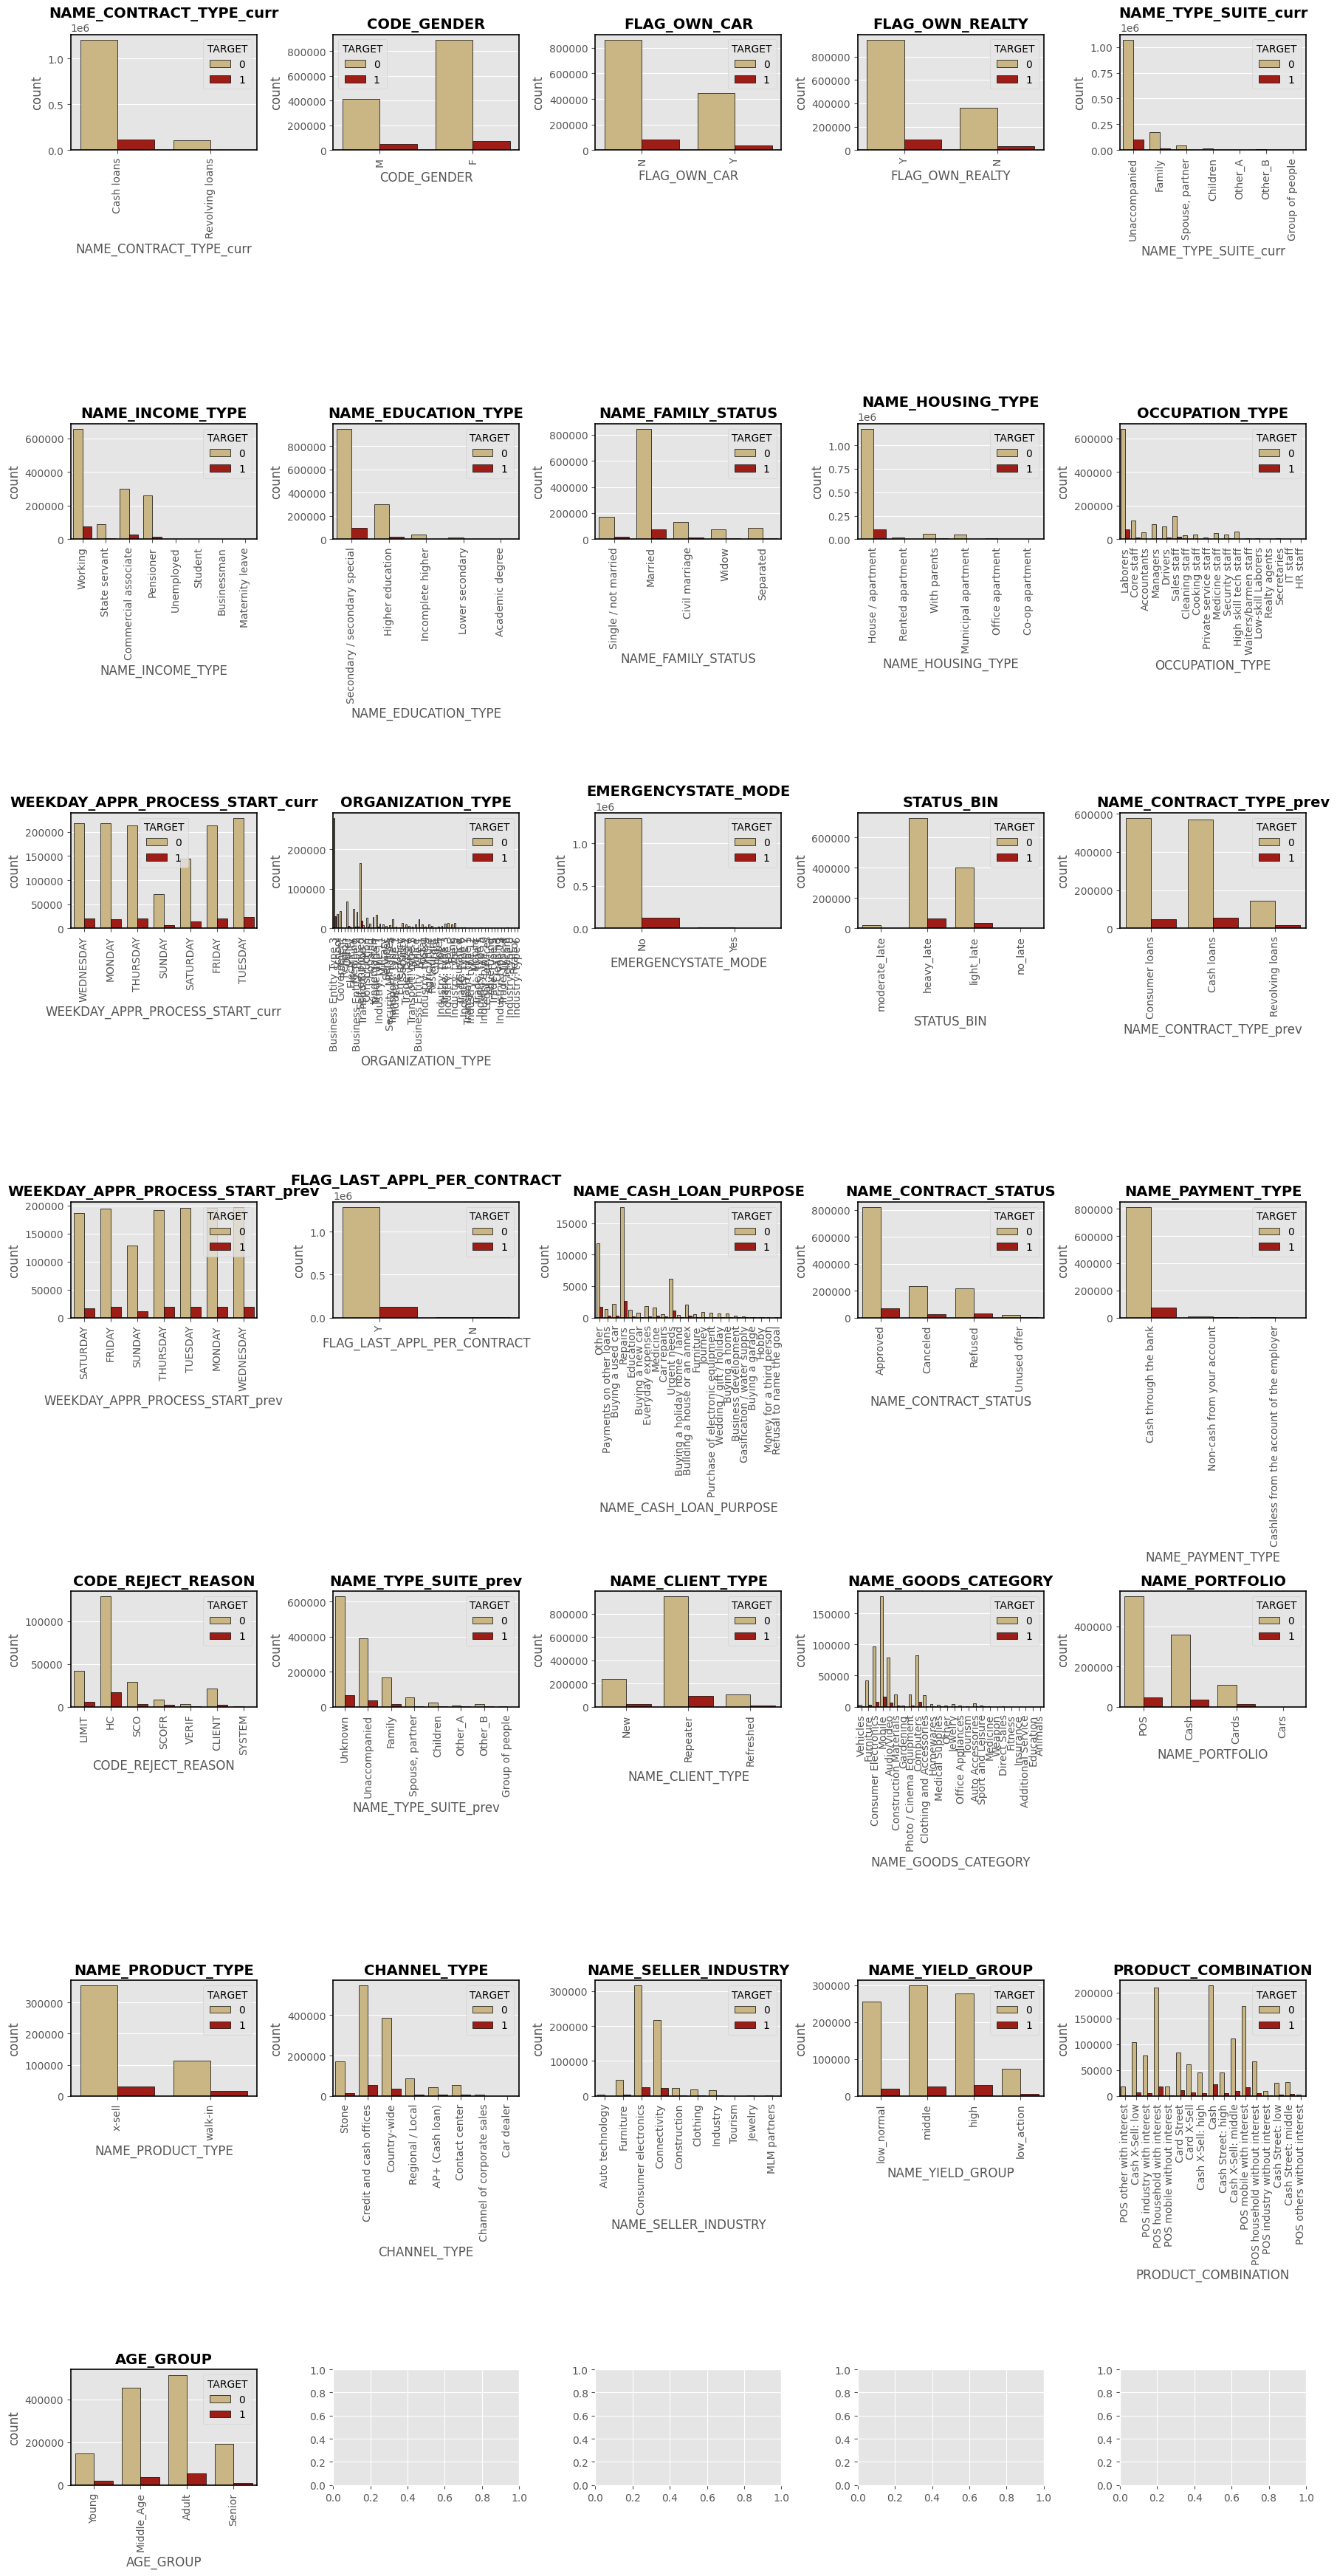

In [66]:
# Style
plt.style.use("ggplot")

custom_palette = {
    1: '#b50900',    
    0: '#d4bb79'     # Red for the other (or pick any other color you prefer)
}

# Create a single figure with 3 columns and 2 rows
fig, axes = plt.subplots(7, 5, figsize=(18, 35))
axes = axes.flatten()  # Flatten for easy iteration

# Plot countplots for the first 6 categorical variables
for idx, column in enumerate(cat_columns):
    if idx >= 31:
        break

    ax = axes[idx]
    
    # Countplot with bar borders
    sns.countplot(data=train_full, x=column, hue=train_full["TARGET"], ax=ax, edgecolor='black', palette=custom_palette)
    
    # Title and label rotation
    ax.set_title(column, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)

    # Add border to the whole chart (axes frame)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
        spine.set_edgecolor('black')

# Hide unused subplots if fewer than 31 variables
for j in range(len(cat_columns), 31):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Multivariate Analysis

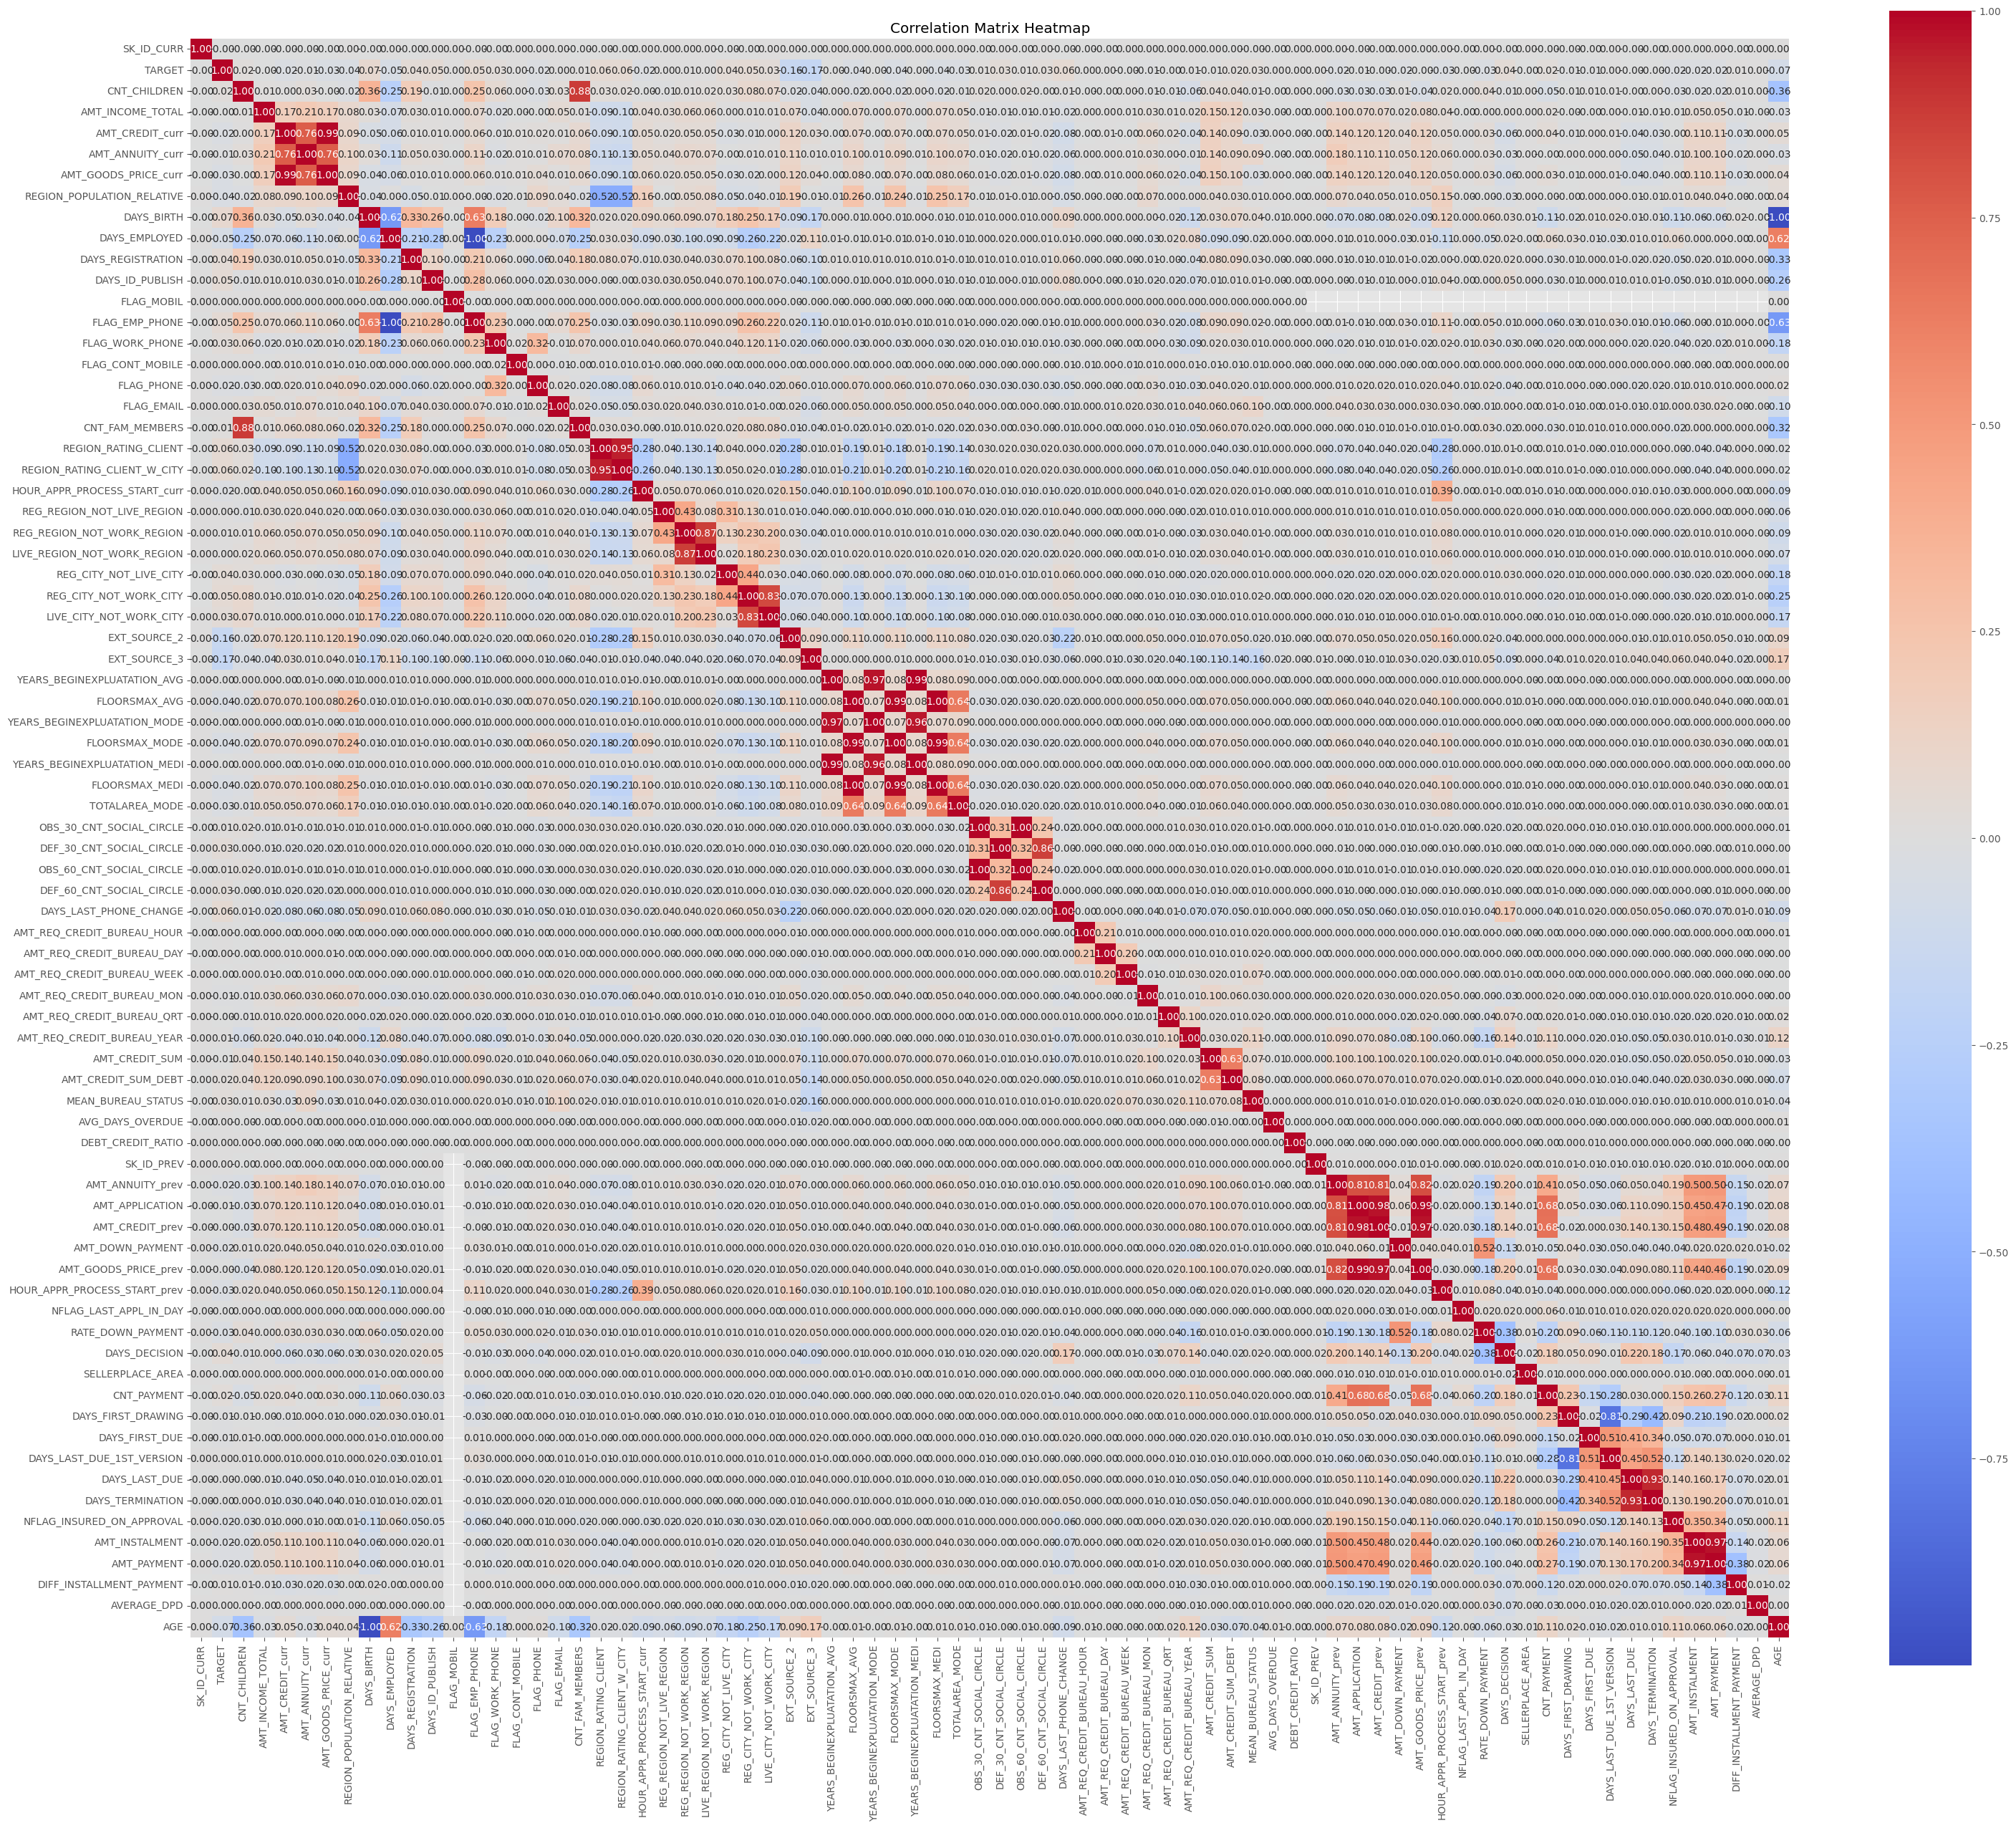

In [78]:

# Compute correlation matrix
corr_matrix = train_full.corr(numeric_only=True)

# Set plot size
plt.figure(figsize=(36, 30))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()


# Handle Outlier

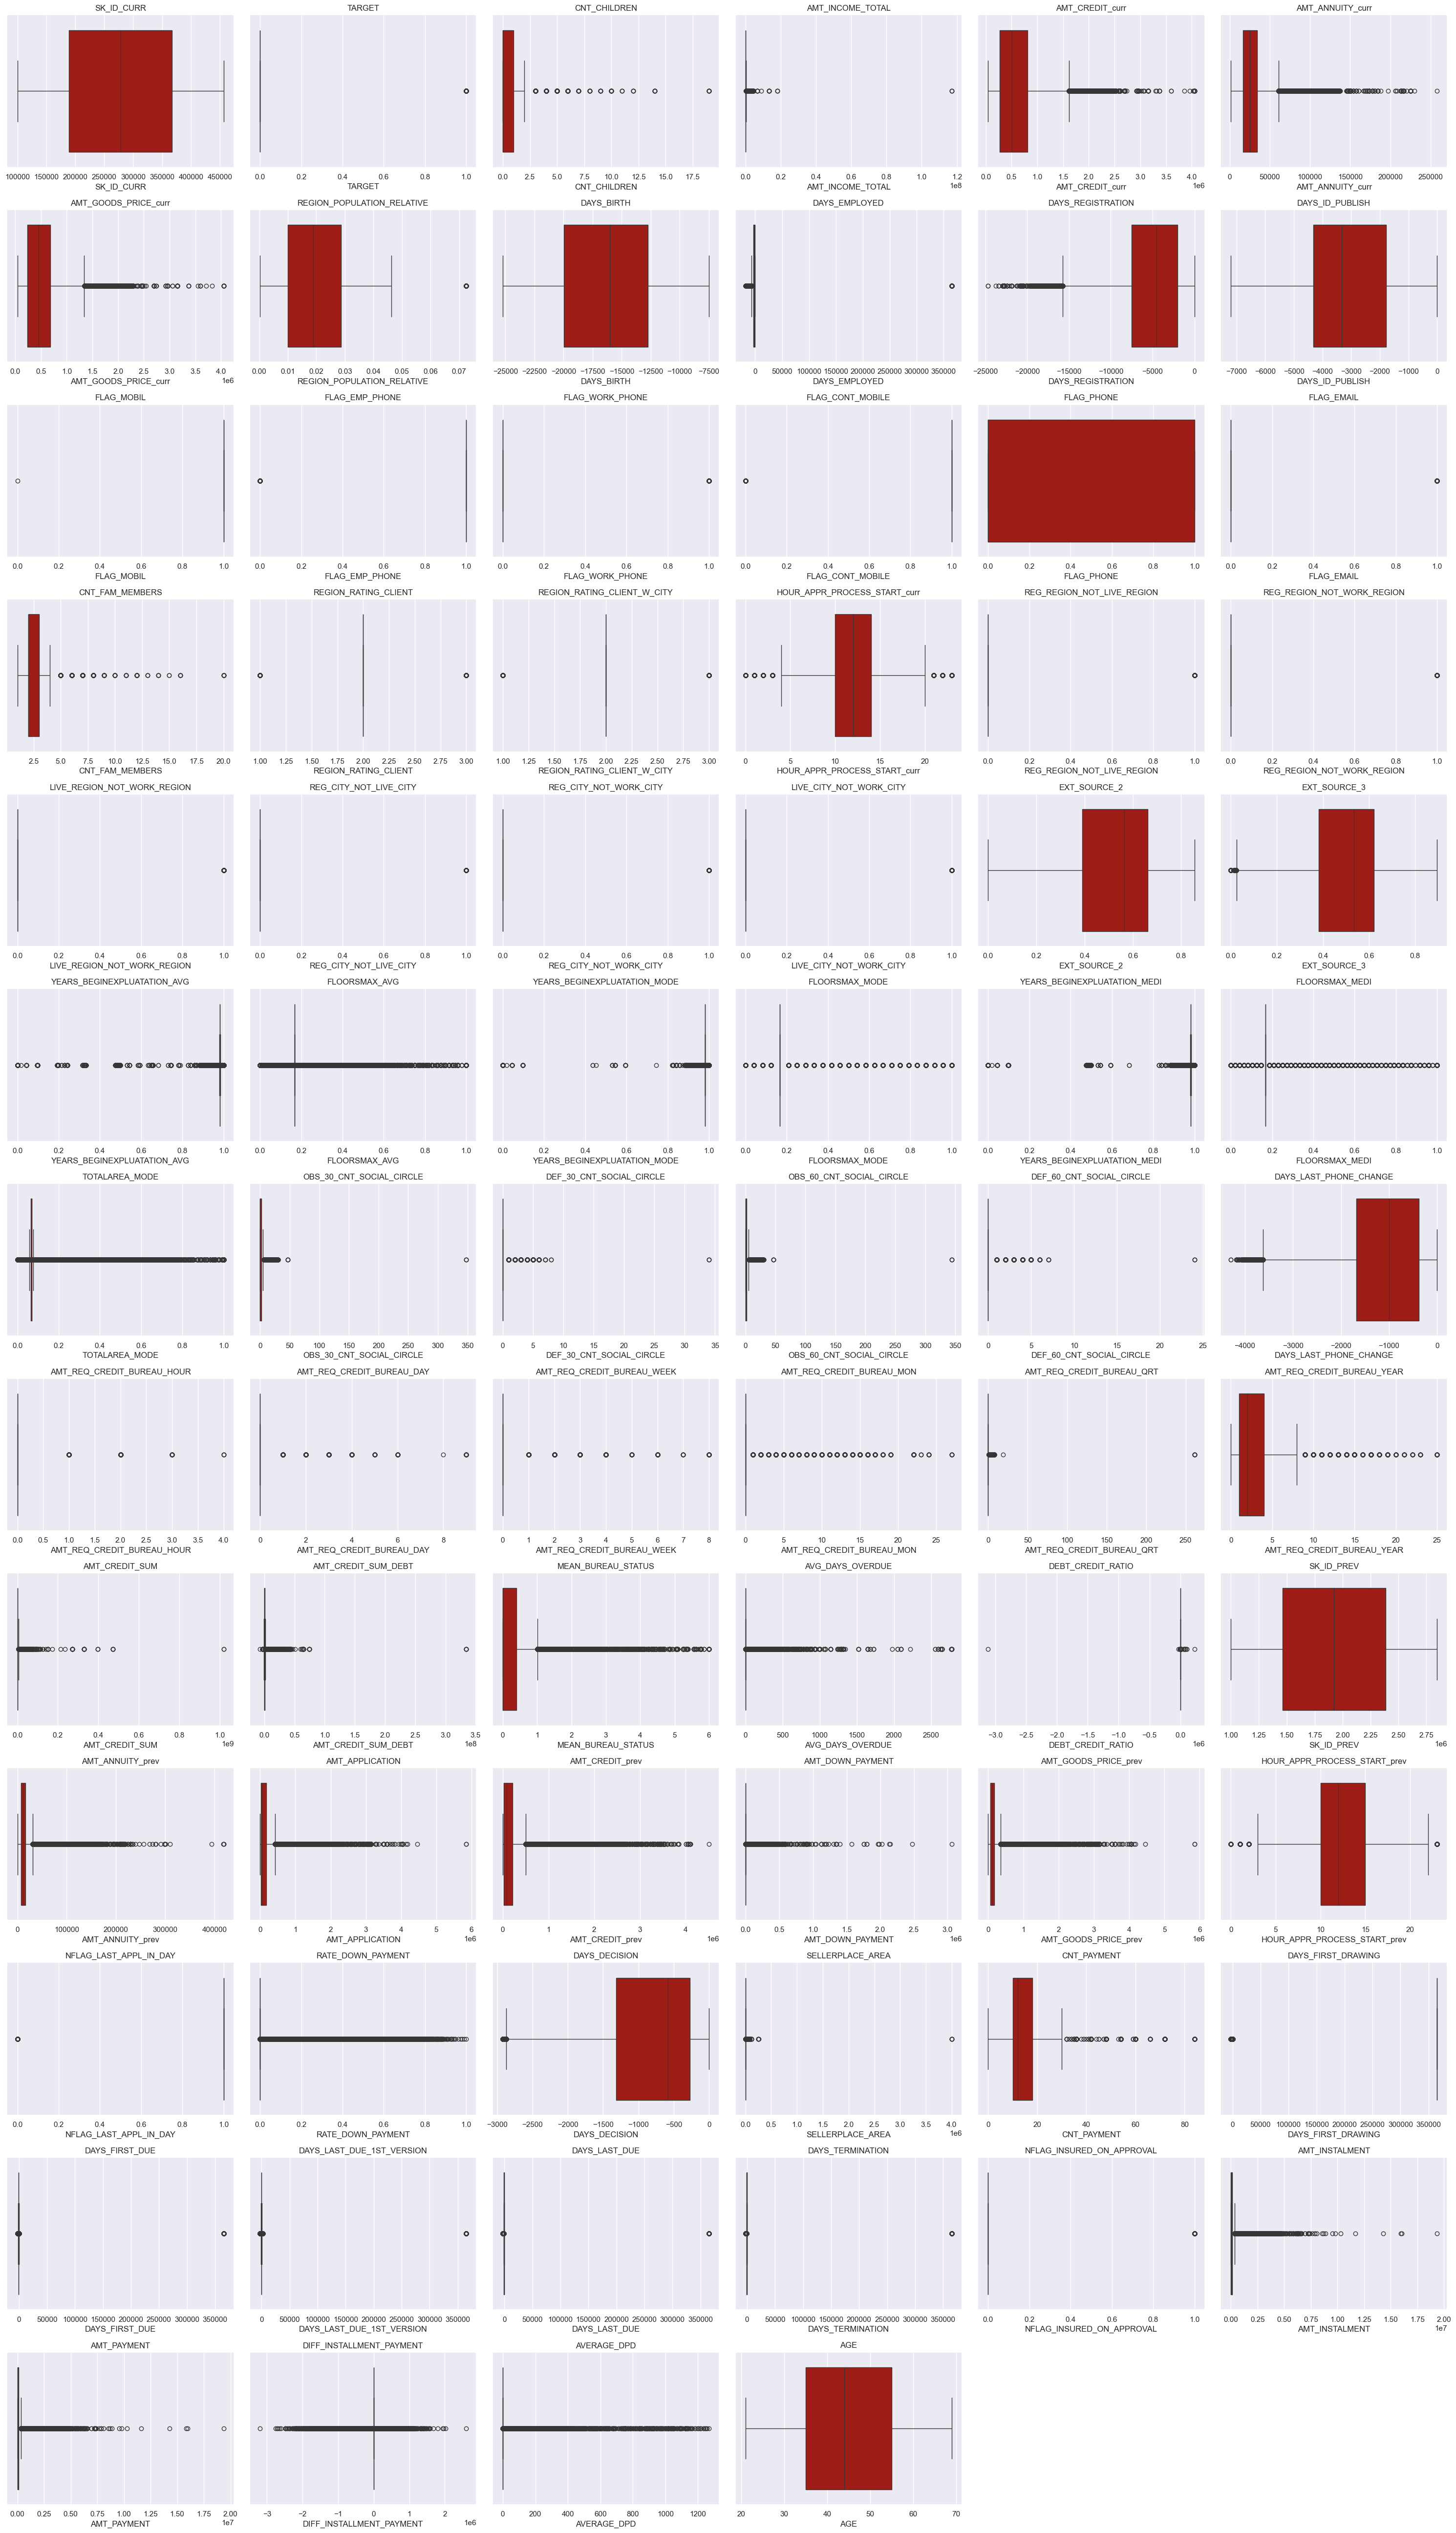

In [26]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure num_columns has 76 columns
n = len(num_columns)
cols = 6  # You can change this
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust for better spacing

for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=train_full, x=column, color='#b50900')
    plt.title(column)

plt.tight_layout()
plt.show()


In [27]:
def outliers_info(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    count = ((series < lower_bound) | (series > upper_bound)).sum()
    return count, upper_bound, lower_bound

In [31]:
import pandas as pd

def get_outliers_dataframe(df, num_cols):
    outliers_data = []  # list to store rows as dictionaries

    for col in num_cols:
        count, upper, lower = outliers_info(df[col])

        if count > 0:
            percentage = (count / len(df)) * 100
            outliers_data.append({
                "column name": col,
                "outlier row": count,
                "outlier percentage": round(percentage, 2)
            })

    # Create DataFrame and sort by outlier count descending
    outliers_df = pd.DataFrame(outliers_data)
    outliers_df = outliers_df.sort_values(by="outlier row", ascending=False).reset_index(drop=True)

    return outliers_df


In [35]:
outlier_df = get_outliers_dataframe(train_full, num_columns)
pd.set_option('display.max_rows', None)
outlier_df


column name  outlier row  outlier percentage
0   YEARS_BEGINEXPLUATATION_MODE       666305               46.59
1                 TOTALAREA_MODE       631993               44.19
2   YEARS_BEGINEXPLUATATION_MEDI       574198               40.15
3    YEARS_BEGINEXPLUATATION_AVG       572838               40.05
4                  FLOORSMAX_AVG       431562               30.18
5                 FLOORSMAX_MEDI       423440               29.61
6                 FLOORSMAX_MODE       414369               28.97
7               DAYS_TERMINATION       405484               28.35
8                  DAYS_LAST_DUE       392253               27.43
9           REGION_RATING_CLIENT       357169               24.97
10     DAYS_LAST_DUE_1ST_VERSION       352192               24.63
11              AMT_DOWN_PAYMENT       350186               24.49
12             RATE_DOWN_PAYMENT       350186               24.49
13                 DAYS_EMPLOYED       348600               24.38
14   REGION_RATING_CLIENT_W_CITY       344069               24.06
15        REG_CITY_NOT_WORK_CITY       317515               22.20
16     AMT_REQ_CREDIT_BUREAU_QRT       301237               21.06
17                DAYS_FIRST_DUE       288949               20.20
18     NFLAG_INSURED_ON_APPROVAL       281844               19.71
19                FLAG_EMP_PHONE       276424               19.33
20               FLAG_WORK_PHONE       260964               18.25
21       LIVE_CITY_NOT_WORK_CITY       248647               17.39
22     AMT_REQ_CREDIT_BUREAU_MON       231629               16.20
23              SELLERPLACE_AREA       227149               15.88
24      DIFF_INSTALLMENT_PAYMENT       220517               15.42
25          AMT_GOODS_PRICE_prev       198621               13.89
26               AMT_APPLICATION       175291               12.26
27      DEF_30_CNT_SOCIAL_CIRCLE       173187               12.11
28                   CNT_PAYMENT       155544               10.88
29                   AMT_PAYMENT       153193               10.71
30               AMT_CREDIT_prev       153174               10.71
31                AMT_INSTALMENT       152186               10.64
32           AMT_CREDIT_SUM_DEBT       141193                9.87
33              AMT_ANNUITY_prev       136752                9.56
34      DEF_60_CNT_SOCIAL_CIRCLE       127723                8.93
35                        TARGET       123340                8.62
36                AMT_CREDIT_SUM       114001                7.97
37      OBS_30_CNT_SOCIAL_CIRCLE       107803                7.54
38      OBS_60_CNT_SOCIAL_CIRCLE       105778                7.40
39        REG_CITY_NOT_LIVE_CITY       105375                7.37
40                    FLAG_EMAIL       102911                7.20
41    REG_REGION_NOT_WORK_REGION        63440                4.44
42                   AVERAGE_DPD        62342                4.36
43          AMT_GOODS_PRICE_curr        59129                4.13
44            DAYS_FIRST_DRAWING        53501                3.74
45   LIVE_REGION_NOT_WORK_REGION        51857                3.63
46    AMT_REQ_CREDIT_BUREAU_WEEK        45603                3.19
47              AMT_INCOME_TOTAL        44236                3.09
48    REGION_POPULATION_RELATIVE        35089                2.45
49              AMT_ANNUITY_curr        30842                2.16
50            MEAN_BUREAU_STATUS        25763                1.80
51               AMT_CREDIT_curr        25010                1.75
52                  CNT_CHILDREN        19902                1.39
53    AMT_REQ_CREDIT_BUREAU_YEAR        18725                1.31
54               CNT_FAM_MEMBERS        18697                1.31
55    REG_REGION_NOT_LIVE_REGION        17582                1.23
56              AVG_DAYS_OVERDUE        17104                1.20
57  HOUR_APPR_PROCESS_START_curr         9578                0.67
58    AMT_REQ_CREDIT_BUREAU_HOUR         7562                0.53
59     AMT_REQ_CREDIT_BUREAU_DAY         7238                

In [30]:
# Accessing categorical features
categorical_features = train_full.select_dtypes(include=['object']).columns.tolist()

print("Categorical Features in train_full:")
for col in categorical_features:
    print(col)  # This line is now properly indented

Categorical Features in train_full:
NAME_CONTRACT_TYPE_curr
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE_curr
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START_curr
ORGANIZATION_TYPE
EMERGENCYSTATE_MODE
STATUS_BIN
NAME_CONTRACT_TYPE_prev
WEEKDAY_APPR_PROCESS_START_prev
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE_prev
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION
AGE_GROUP


# **Business Insight**

## 1. Number of Customer

In [37]:
noc = train_full.groupby('TARGET')['CODE_GENDER'].count().reset_index()
noc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

noc['Customers_pct'] = round(noc.Customers / noc.Customers.sum(), 2)
noc

TARGET  Customers  Customers_pct
0       0    1306758           0.91
1       1     123340           0.09

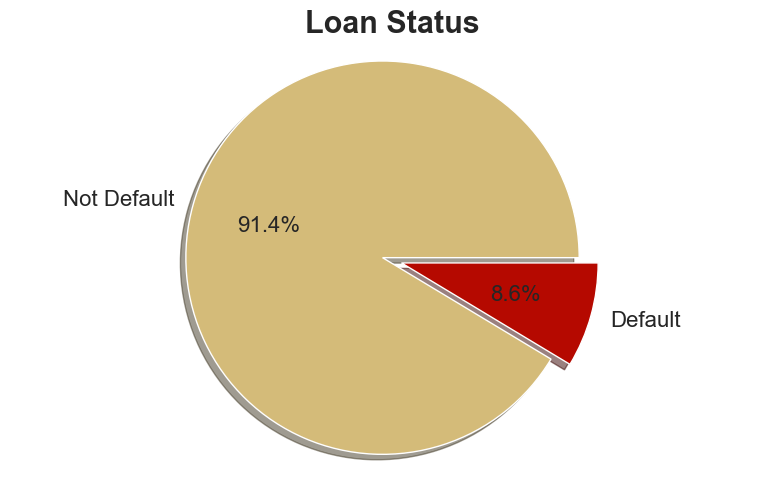

In [39]:

# Create figure with transparent background
fig = plt.figure(figsize=(8, 5), facecolor='none')  # Transparent background

# Labels, colors, and explode settings
my_labels = ['Not Default', 'Default']  # Assuming TARGET = 0 (good), 1 (bad)
my_colors = ['#d4bb79', '#b50900']
my_explode = (0, 0.1)

# Create pie chart with start angle on the right
plt.pie(
    noc['Customers'],
    labels=my_labels,
    autopct='%1.1f%%',
    startangle=0,  # Start at 3 o'clock
    shadow=True,
    colors=my_colors,
    explode=my_explode,
    textprops={'fontsize': 16}
)

# Bold title
plt.title('Loan Status', fontsize=22, fontweight='bold')

# Ensure it's a perfect circle
plt.axis('equal')
plt.tight_layout()
plt.show()


In [42]:
train_full['TARGET'].info()

<class 'pandas.core.series.Series'>
Index: 1430153 entries, 0 to 1430154
Series name: TARGET
Non-Null Count    Dtype
--------------    -----
1430153 non-null  int64
dtypes: int64(1)
memory usage: 21.8 MB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5552\3874535604.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


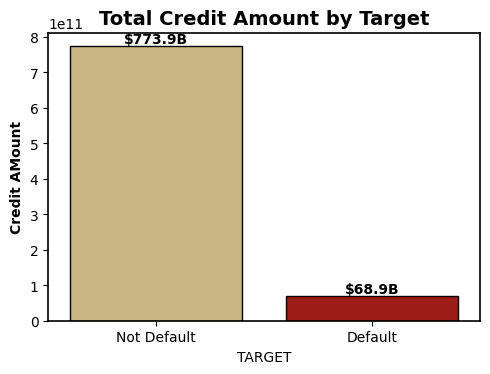

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

# Custom palette for TARGET
custom_palette = {
    '0': '#d4bb79',   # Not Default
    '1': '#b50900'    # Default
}

# Aggregate the data
agg_data = train_full.groupby('TARGET')['AMT_CREDIT_curr'].sum().reset_index()

# Plot
plt.style.use("default")  # Reset to default to remove grid
fig, ax = plt.subplots(figsize=(5, 4))

bars = sns.barplot(
    data=agg_data,
    x='TARGET',
    y='AMT_CREDIT_curr',
    palette=custom_palette,
    edgecolor='black',  # Border for each bar
    ax=ax
)

# Add data labels in compact format
for p in ax.patches:
    value = p.get_height()
    label = f'${format_large_number(value)}'
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Customize axes and borders
ax.set_title('Total Credit Amount by Target', fontsize=14, fontweight='bold')
ax.set_xlabel('TARGET', fontsize=10)
ax.set_ylabel('Credit AMount', fontsize=10, fontweight='bold')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Default', 'Default'], fontsize=10)
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_edgecolor('black')

# Remove grid
ax.grid(False)

plt.tight_layout()
plt.show()


## 2. Status Bin

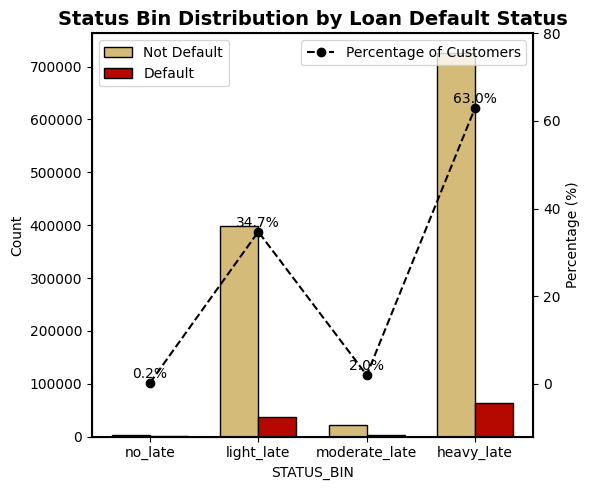

In [ ]:

# Custom color palette for TARGET
target_palette = {
    0: '#d4bb79',   # Not Default
    1: '#b50900'    # Default
}

# Prepare bar data grouped by STATUS_BIN and TARGET
grouped = train_full.groupby(['STATUS_BIN', 'TARGET']).size().unstack(fill_value=0).reindex(['no_late', 'light_late', 'moderate_late', 'heavy_late'])

# Percentage of customers per STATUS_BIN
status_group_counts = train_full['STATUS_BIN'].value_counts(normalize=True).reindex(grouped.index) * 100

# Set up plot
fig, ax1 = plt.subplots(figsize=(6, 5))

bar_width = 0.35
x = np.arange(len(grouped.index))

# Plot bars for each TARGET class
for i, target in enumerate([0, 1]):
    ax1.bar(
        x + (i - 0.5) * bar_width,
        grouped[target],
        width=bar_width,
        label='Default' if target == 1 else 'Not Default',
        color=target_palette[target],
        edgecolor='black'
    )

# Set X-axis labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(grouped.index, fontsize=10)
ax1.set_ylabel('Count')
ax1.set_xlabel('STATUS_BIN')
ax1.set_title('Status Bin Distribution by Loan Default Status', fontsize=14, fontweight='bold')

# Remove grid
ax1.grid(False)

# Add border to entire plot
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Line chart on secondary Y-axis
ax2 = ax1.twinx()
ax2.plot(
    status_group_counts.index,
    status_group_counts.values,
    color='black',
    marker='o',
    linestyle='--',
    label='Percentage of Customers'
)

# Add percentage labels
for x_val, y_val in zip(x, status_group_counts.values):
    ax2.text(x_val, y_val + 0.5, f'{y_val:.1f}%', ha='center', va='bottom', color='black')

ax2.set_ylabel('Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(-12, 80)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## 3. Who

Clients Age Distribution

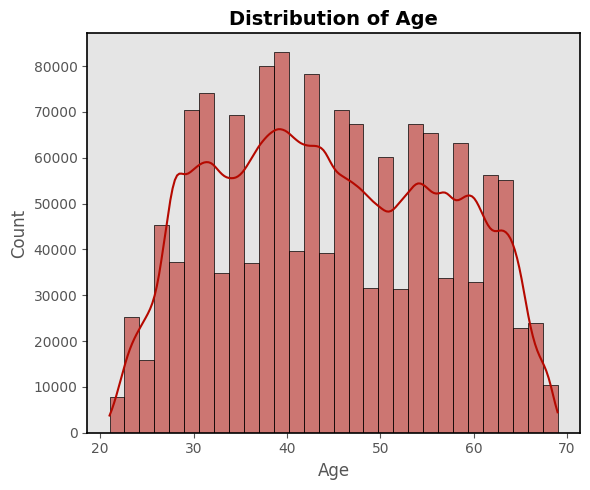

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.histplot(data=train_full, x='AGE', bins=30, kde=True, color='#b50900', edgecolor='black')

plt.title('Distribution of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
# Add border to the plot
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


Clients Gender Distribution

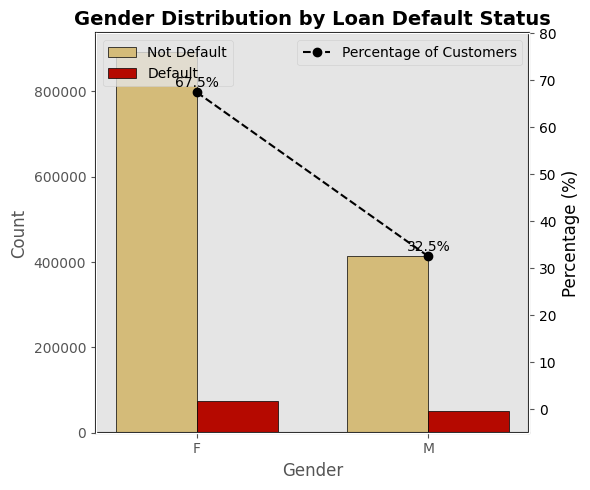

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Custom color palette for TARGET
target_palette = {
    0: '#d4bb79',   # Not Default
    1: '#b50900'    # Default
}

# Grouped bar data by CODE_GENDER and TARGET
grouped = train_full.groupby(['CODE_GENDER', 'TARGET']).size().unstack(fill_value=0)

# Percentage of customers per gender group
gender_group_counts = train_full['CODE_GENDER'].value_counts(normalize=True).reindex(grouped.index) * 100

# Set up plot
fig, ax1 = plt.subplots(figsize=(6, 5))

bar_width = 0.35
x = np.arange(len(grouped.index))

# Plot bars for each TARGET class
for i, target in enumerate([0, 1]):
    ax1.bar(
        x + (i - 0.5) * bar_width,
        grouped[target],
        width=bar_width,
        label='Default' if target == 1 else 'Not Default',
        color=target_palette[target],
        edgecolor='black'
    )

# Set X-axis labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(grouped.index, fontsize=10)
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender')
ax1.set_title('Gender Distribution by Loan Default Status', fontsize=14, fontweight='bold')

# Add border to entire plot
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

# Line chart on secondary Y-axis
ax2 = ax1.twinx()
ax2.plot(
    gender_group_counts.index,
    gender_group_counts.values,
    color='black',
    marker='o',
    linestyle='--',
    label='Percentage of Customers'
)

# Add percentage labels
for x_val, y_val in zip(x, gender_group_counts.values):
    ax2.text(x_val, y_val + 0.5, f'{y_val:.1f}%', ha='center', va='bottom', color='black')

ax2.set_ylabel('Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(-5, 80)

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()


Clients Organization Type

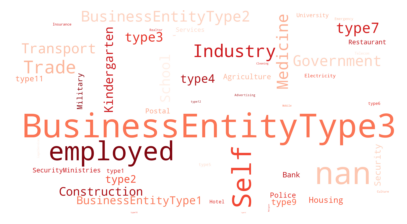

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remove spaces within each value
organization = train_full['ORGANIZATION_TYPE'].str.replace(" ", "", regex=False)

# Join all cleaned strings into one big string
org_text = " ".join(organization.astype(str))

# Generate the word cloud
word_cloud1 = WordCloud(
    collocations=False,
    background_color='white',
    width=2048,
    height=1080,
    colormap='Reds'
).generate(org_text)

# Plot the word cloud
plt.figure(figsize=(5, 4))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


In [93]:
train_full[train_full['ORGANIZATION_TYPE'].isin(['Business Entity Type 2', 'Business Entity Type 3'])] \
    .groupby('ORGANIZATION_TYPE') \
    .agg({
        'AMT_INCOME_TOTAL': ['mean', 'median'],
        'AGE': ['mean'],
        'TARGET': 'mean'
    })

AMT_INCOME_TOTAL                  AGE    TARGET
                                   mean    median       mean      mean
ORGANIZATION_TYPE                                                     
Business Entity Type 2    173928.169900  157500.0  41.223546  0.092354
Business Entity Type 3    193118.496977  171000.0  40.300507  0.099162

# Export Dataset

In [94]:
train_full.to_parquet(
    'C:/Users/Lenovo/Downloads/PBI/Home Credit/train_full.parquet',
    engine='pyarrow',
    index=False,
    compression='snappy' 
)

In [95]:
train_loaded = pd.read_parquet('C:/Users/Lenovo/Downloads/PBI/Home Credit/train_full.parquet', engine='pyarrow')
print(train_loaded.dtypes.equals(train_full.dtypes))  # Harus True
print(train_loaded.equals(train_full))  

True
False
